In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from numba import njit

# Task 8

In [37]:
def power_method(A, q=None, n_iters=100):
    n = len(A)

    if q is None:
        q = np.ones(n)

    eigen_values = np.zeros(n_iters)
    for i in range(n_iters):
        z = A @ q
        q = z / np.linalg.norm(z)
        eigen_values[i] = q @ A @ q
    
    return eigen_values

In [52]:
n = 100
A = ss.uniform.rvs(size=n ** 2, random_state=42).reshape(n, n)
eigen_value_history = power_method(A)
stable_idx = np.argmin(np.abs(eigen_value_history[1:] - eigen_value_history[:-1])) + 1
stable_eigenval = eigen_value_history[stable_idx]

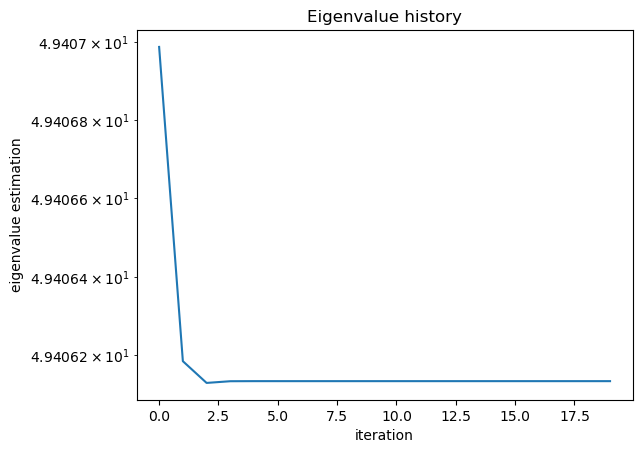

In [53]:
plt.title('Eigenvalue history')
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('eigenvalue estimation')
plt.plot(range(stable_idx + 5), eigen_value_history[:stable_idx + 5])
plt.show()

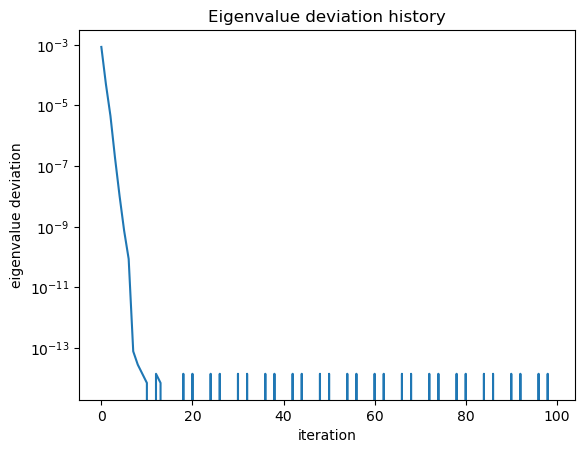

In [54]:
plt.title('Eigenvalue deviation history')
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('eigenvalue deviation')
plt.plot(range(len(eigen_value_history)), np.abs(eigen_value_history - stable_eigenval))
plt.show()

# Task 9

In [18]:
def basic_qr(A, n_iter=100):
    T_hist = np.zeros((n_iter + 1, *A.shape))

    T_hist[0] = A.copy()
    for i in range(n_iter):
        Q, R = np.linalg.qr(T_hist[i])
        T_hist[i + 1] = R @ Q
    
    return T_hist

In [58]:
n = 100
A = ss.uniform.rvs(size=n ** 2, random_state=42).reshape(n, n)
T_hist = basic_qr(A, n_iter=100)

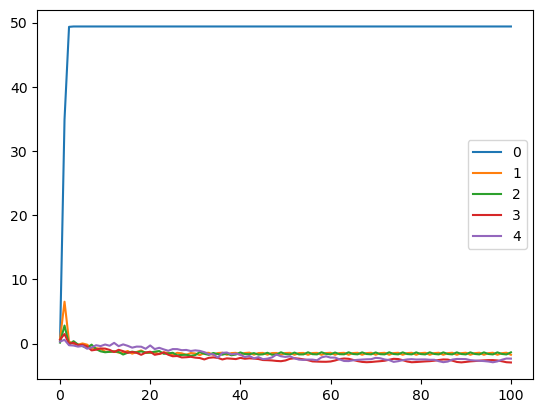

In [59]:
n_diag = 5
diag_hist = T_hist.diagonal(axis1=1, axis2=2)[:, :n_diag]
for i in range(n_diag):
    plt.plot(range(len(diag_hist)), diag_hist[:, i], label=f'{i}')

plt.legend()
plt.show()

In [60]:
stable_idx = np.argmin(np.abs(diag_hist[1:] - diag_hist[:-1]), axis=0)
stable_eigenval = diag_hist.take(stable_idx)

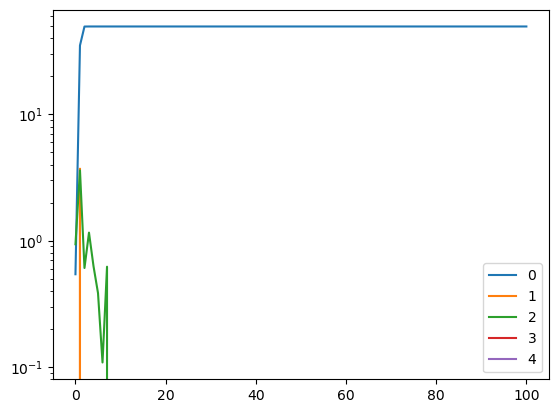

In [61]:
n_diag = 5
diag_hist = T_hist.diagonal(axis1=1, axis2=2)[:, :n_diag]

plt.yscale('log')
for i in range(n_diag):
    plt.plot(range(len(diag_hist)), diag_hist[:, i] - stable_eigenval[i], label=f'{i}')

plt.legend()
plt.show()

In [62]:
T_hist = basic_qr(A, n_iter=5000)
T_hist = T_hist > 1e-10

100
500
1000
5000


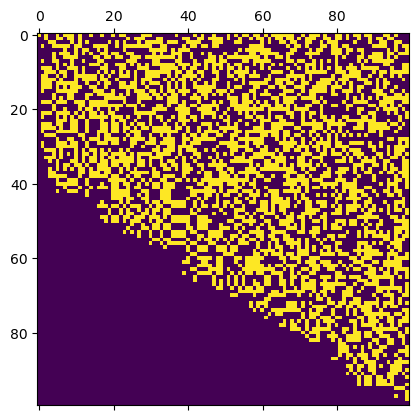

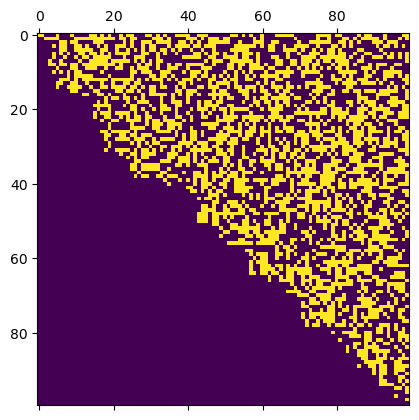

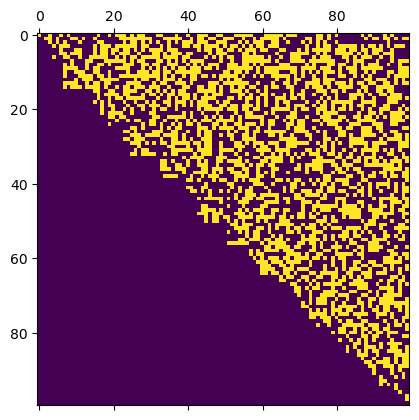

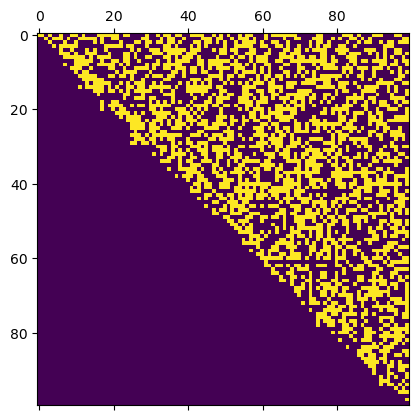

In [67]:
for i in [100, 500, 1000, 5000]:
    print(i)
    plt.matshow(T_hist[i])

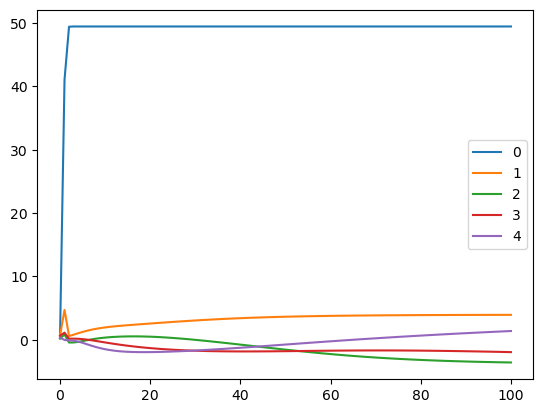

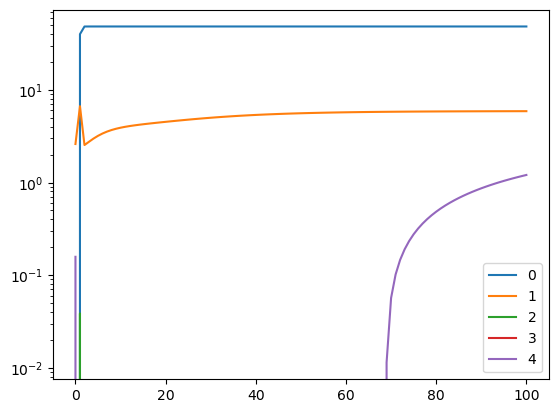

100
500
1000
5000


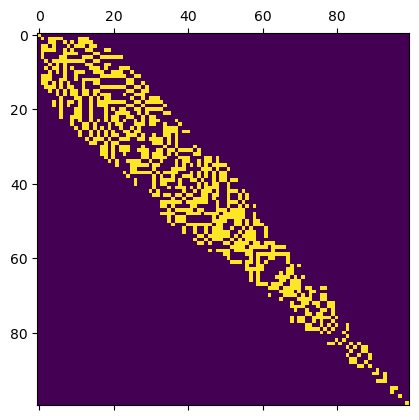

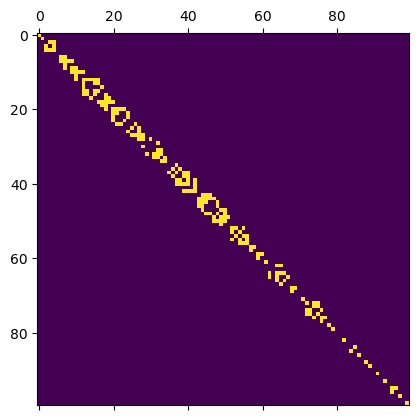

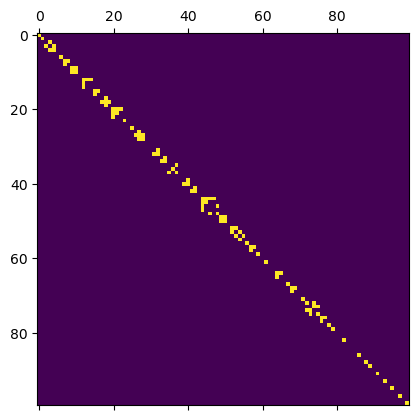

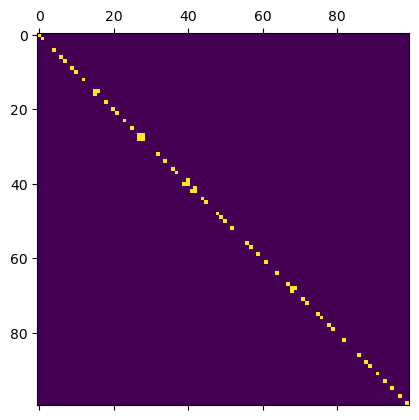

In [69]:
A = (A + A.T) / 2
T_hist = basic_qr(A, n_iter=100)

n_diag = 5
diag_hist = T_hist.diagonal(axis1=1, axis2=2)[:, :n_diag]
for i in range(n_diag):
    plt.plot(range(len(diag_hist)), diag_hist[:, i], label=f'{i}')

plt.legend()
plt.show()
stable_idx = np.argmin(np.abs(diag_hist[1:] - diag_hist[:-1]), axis=0)
stable_eigenval = diag_hist.take(stable_idx)
n_diag = 5
diag_hist = T_hist.diagonal(axis1=1, axis2=2)[:, :n_diag]

plt.yscale('log')
for i in range(n_diag):
    plt.plot(range(len(diag_hist)), diag_hist[:, i] - stable_eigenval[i], label=f'{i}')

plt.legend()
plt.show()
T_hist = basic_qr(A, n_iter=5000)
T_hist = T_hist > 1e-10
for i in [100, 500, 1000, 5000]:
    print(i)
    plt.matshow(T_hist[i])